<a href="https://www.kaggle.com/code/ipatra/iris-flower-classification-machine-learning?scriptVersionId=184121231" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<a id="1"></a>
<h1 style="background-color:#ADD8E6;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 10px 10px;color:black;">
    Iris Flower Classification Machine Learning
</h1>


This Project is thorugh application of machine learning with python programming. It focuses on IRIS flower classification using Machine Learning with scikit tools. Here some of algorithm are used that are some types of machine learning subparts algorithms of supervised and Unsupervised learning. Algorithm used for predicting and get accuracy are -

Dicision tree classifier
K nearest classifier
SVM
Logistic Regression
metrics
train_test_split We are making accuracy and prediction in Iris project through Iris Dataset. This is easy and understable for machine learning staters( Naive ).

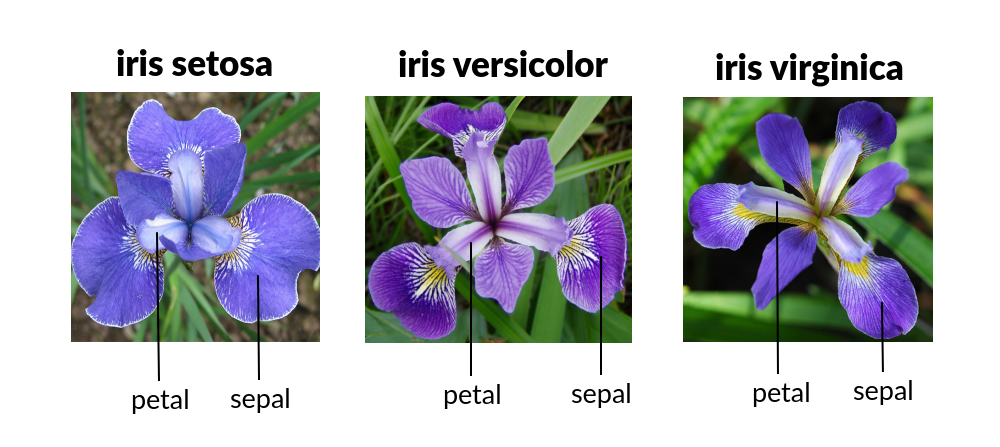

The dataset was split into training set (80%) and test set (20%). The dataset is shuffled before splitting in order to eliminate the possibility of any initial structure in the dataset.

For every observation in the test set, its distance is calculated from all observations in the training set. For this project, 3 different distances were used in this step, to account for and report on the sensitivity of each distance metric:

Euclidean distance
Manhattan distance
Jaccard distance of sample sets
5-fold Cross Validation was implemented to obtain the percentage of correct classification as a function of the number of nearest neighbours, for the different k values and distance metrics. The method for cross validation is generalized so as to accept a user-defined parameter of the number of groups that a given data sample is to be split into; for this project, 5 was chosen.

<a id="table"></a>
<h1 style="background-color:#ADD8E6;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;color:black;">Table Of Content</h1>

* [1. IMPORTING LIBRARIES](#1)
    
* [2. LOAD THE DATASET](#2)
  
* [3. EXPLORATORY SOME INFORMATION ABOUT DATASET](#3)

* [4. EDA](#4)

* [5. PREDICTION ](#5)

* [6. AUTHOR MESSAGE ](#6)

<span style="color:#FF00FF;font-family:serif; font-size:28px;"> Let's see the beautiful project!!</span>

<a id="1"></a>
<h1 style="background-color:#ADD8E6;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 10px 10px;color:black;">Import Libraries</h1>

In [1]:
import pandas as pd
import warnings
warnings.simplefilter('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

<a id="1"></a>
<h1 style="background-color:#ADD8E6;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 10px 10px;color:black;">Load the Dataset</h1>

In [2]:
df=pd.read_csv("/kaggle/input/iris-dataset/irisDataSet.csv")

Top five data

In [3]:
df.head()

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,species
0,NaN,5.1,3.5,1.4,0.2,setosa
1,NaN,4.9,3.0,1.4,0.2,setosa
2,NaN,4.7,3.2,1.3,0.2,setosa
3,NaN,4.6,3.1,1.5,0.2,setosa
4,NaN,5.0,3.6,1.4,0.2,setosa


Last five data

In [4]:
df.tail()

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,species
145,NaN,6.7,3.0,5.2,2.3,virginica
146,NaN,6.3,2.5,5.0,1.9,virginica
147,NaN,6.5,3.0,5.2,2.0,virginica
148,NaN,6.2,3.4,5.4,2.3,virginica
149,NaN,5.9,3.0,5.1,1.8,virginica


Five data

In [5]:
df.sample(5)

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,species
69,NaN,5.6,2.5,3.9,1.1,versicolor
100,NaN,6.3,3.3,6.0,2.5,virginica
104,NaN,6.5,3.0,5.8,2.2,virginica
85,NaN,6.0,3.4,4.5,1.6,versicolor
64,NaN,5.6,2.9,3.6,1.3,versicolor


Dataframe column information

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    0 non-null      float64
 1   sepal_length  150 non-null    float64
 2   sepal_width   150 non-null    float64
 3   petal_length  150 non-null    float64
 4   petal_width   150 non-null    float64
 5   species       150 non-null    object 
dtypes: float64(5), object(1)
memory usage: 7.2+ KB


Identifie Null Values

In [7]:
df.isnull().sum()

Unnamed: 0      150
sepal_length      0
sepal_width       0
petal_length      0
petal_width       0
species           0
dtype: int64

Correlation

In [8]:
df.corr()

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width
Unnamed: 0,NaN,NaN,NaN,NaN,NaN
sepal_length,NaN,1.000000,-0.109369,0.871754,0.817954
sepal_width,NaN,-0.109369,1.000000,-0.420516,-0.356544
petal_length,NaN,0.871754,-0.420516,1.000000,0.962757
petal_width,NaN,0.817954,-0.356544,0.962757,1.000000


Mean, Median, Std vs.. Describe

In [9]:
df.describe()

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width
count,0.0,150.000000,150.000000,150.000000,150.000000
mean,NaN,5.843333,3.054000,3.758667,1.198667
std,NaN,0.828066,0.433594,1.764420,0.763161
min,NaN,4.300000,2.000000,1.000000,0.100000
25%,NaN,5.100000,2.800000,1.600000,0.300000
50%,NaN,5.800000,3.000000,4.350000,1.300000
75%,NaN,6.400000,3.300000,5.100000,1.800000
max,NaN,7.900000,4.400000,6.900000,2.500000


Column names

In [10]:
df.columns

Index(['Unnamed: 0', 'sepal_length', 'sepal_width', 'petal_length',
       'petal_width', 'species'],
      dtype='object')

In [11]:
df.drop('Unnamed: 0',axis=1,inplace=True)

<a id="1"></a>
<h1 style="background-color:#ADD8E6;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 10px 10px;color:black;">EDA</h1>

In [12]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [13]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

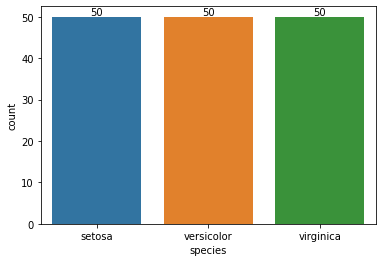

In [14]:
ax=sns.countplot(x=df["species"])
ax.bar_label(ax.containers[0]);

In [15]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [16]:
#Distribution chart of iris types according to sepal length and sepal width

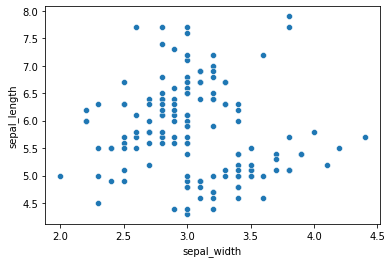

In [17]:
sns.scatterplot(df["sepal_width"],df["sepal_length"]);

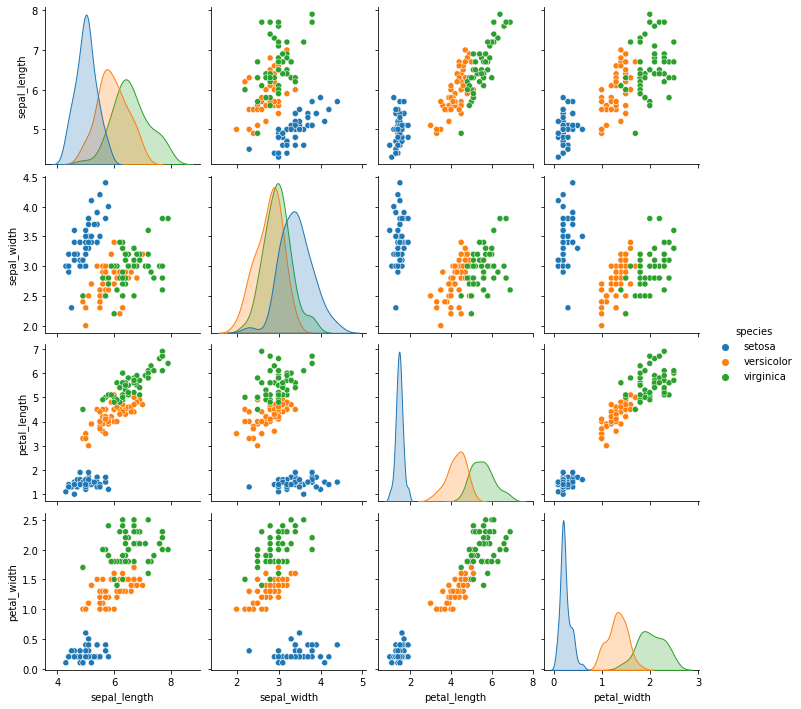

In [18]:
sns.pairplot(df,hue="species");

Relationship between sepal width and sepal length

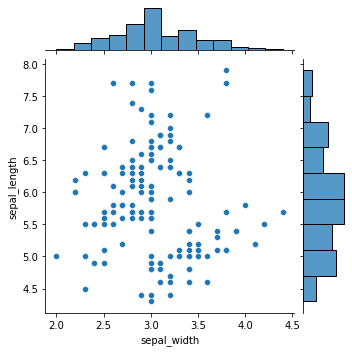

In [19]:
sns.jointplot(x="sepal_width", y="sepal_length", data=df, size=5)

array([[<AxesSubplot:title={'center':'petal_length'}, xlabel='[species]'>,
        <AxesSubplot:title={'center':'petal_width'}, xlabel='[species]'>],
       [<AxesSubplot:title={'center':'sepal_length'}, xlabel='[species]'>,
        <AxesSubplot:title={'center':'sepal_width'}, xlabel='[species]'>]],
      dtype=object)

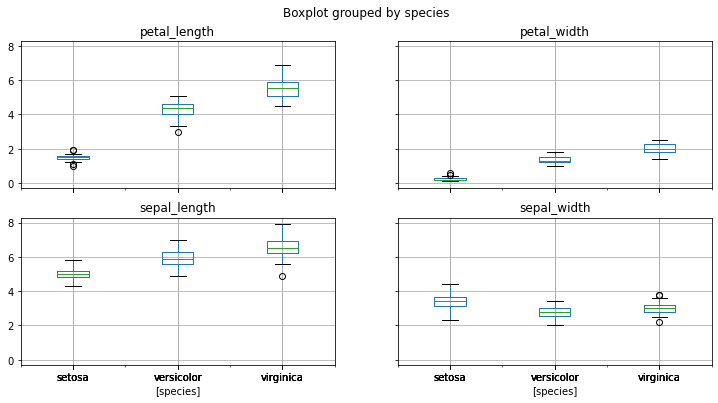

In [20]:
df.boxplot(by="species", figsize=(12, 6))

<a id="1"></a>
<h1 style="background-color:#ADD8E6;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 10px 10px;color:black;">Prediction</h1>

In [21]:
x=df.drop('species',axis=1)
y=df['species']

In [22]:
def classification(x,y):
    from sklearn.naive_bayes import GaussianNB
    from sklearn.naive_bayes import BernoulliNB
    from sklearn.svm import SVC
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import LogisticRegression
    
    from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
    from sklearn.metrics import confusion_matrix,classification_report
       
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

    g=GaussianNB()
    b=BernoulliNB()
    KN=KNeighborsClassifier()
    SVC=SVC() 
    D=DecisionTreeClassifier()
    R=RandomForestClassifier()
    Log=LogisticRegression()
    
    algos=[g,b,KN,SVC,D,R,Log]
    algo_names=['GaussianNB','BernoulliNB','KNeighborsClassifier','SVC','DecisionTreeClassifier','RandomForestClassifier','LogisticRegression']
   
    accuracy_scored=[]

    
    for item in algos:
        item.fit(x_train,y_train)
        item.predict(x_test)
        
        accuracy_scored.append(accuracy_score(y_test,item.predict(x_test)))
       
    result=pd.DataFrame(columns=['accuracy_score'],index=algo_names)
    result['accuracy_score']=accuracy_scored
    return result.sort_values('accuracy_score',ascending=False)

In [23]:
classification(x,y)

,accuracy_score
GaussianNB,1.0
KNeighborsClassifier,1.0
SVC,1.0
DecisionTreeClassifier,1.0
RandomForestClassifier,1.0
LogisticRegression,1.0
BernoulliNB,0.3


In [24]:
#Let's guess iris species by entering iris flower data.

In [25]:
from sklearn.svm import SVC

In [26]:
s=SVC()

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [29]:
pred=s.fit(x_train,y_train).predict(x_test)

In [30]:
confusion_matrix(y_test,pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [31]:
s.predict([[5.1,3.5,1.4,0.2]])

array(['setosa'], dtype=object)

<a id="1"></a>
<h1 style="background-color:#ADD8E6;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 10px 10px;color:black;">Conclusion</h1>

* Machine learning models successfully classified Iris flowers with high accuracy, demonstrating the potential for automated flower identification in various applications.
* KNN emerged as the optimal model, offering a balance of accuracy and efficiency.
* Further exploration could involve optimizing hyperparameters, testing with imbalanced datasets, and implementing the model on real-world scenarios.